In [218]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [135]:
trace_list = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')
bind_list = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*')
coord_list = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')
trace_list, bind_list, coord_list

(['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-7dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-01_2photon_sess-01-8dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_regtrace.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-6dpf_BLNGR_run-01_regtrace.npy',
  'BLN

In [ ]:
n_neigh = 30
dim = [.8, .8, 15]
reg_list = ['all', 'Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']


for i in range(len(trace_list)):

    trace = np.load(trace_list[i])
    bind = np.load(bind_list[i])
    coord = (np.load(coord_list[i]))
    name = adfn.save_name(trace_list[i])

    for reg in reg_list:
        trace, bind, coord = tfn.select_region(trace, bind, coord, reg)
        data = tfn.trace_analyse(name).criticality(trace, bind, coord, n_neigh, dim)
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_criticality.npy', data.__dict__)
    print('Processed ' + name)

# Tectal data

In [51]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_bin = sorted(glob.glob('*NR*3dpf*spikes.dat*')) 
NR_5_bin = sorted(glob.glob('*NR*5dpf*spikes.dat*')) 
NR_7_bin = sorted(glob.glob('*NR*7dpf*spikes.dat*')) 

GR_3_bin = sorted(glob.glob('*GR*3dpf*spikes.dat*')) 
GR_5_bin = sorted(glob.glob('*GR*5dpf*spikes.dat*')) 
GR_7_bin = sorted(glob.glob('*GR*7dpf*spikes.dat*')) 

NR_3_coord = sorted(glob.glob('*NR*3dpf*cent*')) 
NR_5_coord = sorted(glob.glob('*NR*5dpf*cent*')) 
NR_7_coord = sorted(glob.glob('*NR*7dpf*cent*')) 

GR_3_coord = sorted(glob.glob('*GR*3dpf*cent*')) 
GR_5_coord = sorted(glob.glob('*GR*5dpf*cent*')) 
GR_7_coord = sorted(glob.glob('*GR*7dpf*cent*')) 

bin_list = NR_3_bin, NR_5_bin, NR_7_bin, GR_3_bin, GR_5_bin, GR_7_bin
coord_list = NR_3_coord, NR_5_coord, NR_7_coord, GR_3_coord, GR_5_coord, GR_7_coord

In [ ]:
#nnb
#-------
for i in range(len(coord_list)):
    for e in range(len(coord_list[i])):
        coord = np.loadtxt(coord_list[i][e])
        nnb = crfn.neighbour_new(coord, 50, [.8, .8, 5])
        np.save(savepath + coord_list[i][e][:coord_list[i][e].find('all_cells')+10] + 'nnb.npy', nnb)
        print('Done ' + coord_list[i][e])

In [71]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_nnb = sorted(glob.glob('*NR*3dpf*nnb*')) 
NR_5_nnb = sorted(glob.glob('*NR*5dpf*nnb*')) 
NR_7_nnb = sorted(glob.glob('*NR*7dpf*nnb*')) 

GR_3_nnb = sorted(glob.glob('*GR*3dpf*nnb*')) 
GR_5_nnb = sorted(glob.glob('*GR*5dpf*nnb*')) 
GR_7_nnb = sorted(glob.glob('*GR*7dpf*nnb*')) 
nnb_list = NR_3_nnb, NR_5_nnb, NR_7_nnb, GR_3_nnb, GR_5_nnb, GR_7_nnb

In [90]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_pkg = sorted(glob.glob('*NR*3dpf*pkg*')) 
NR_5_pkg = sorted(glob.glob('*NR*5dpf*pkg*')) 
NR_7_pkg = sorted(glob.glob('*NR*7dpf*pkg*')) 

GR_3_pkg = sorted(glob.glob('*GR*3dpf*pkg*')) 
GR_5_pkg = sorted(glob.glob('*GR*5dpf*pkg*')) 
GR_7_pkg = sorted(glob.glob('*GR*7dpf*pkg*')) 
NR_3_av = sorted(glob.glob('*NR*3dpf*av*')) 
NR_5_av = sorted(glob.glob('*NR*5dpf*av*')) 
NR_7_av = sorted(glob.glob('*NR*7dpf*av*')) 

GR_3_av = sorted(glob.glob('*GR*3dpf*av*')) 
GR_5_av = sorted(glob.glob('*GR*5dpf*av*')) 
GR_7_av = sorted(glob.glob('*GR*7dpf*av*')) 
NR_list = NR_3_av, NR_5_av, NR_7_av
GR_list = GR_3_av, GR_5_av, GR_7_av
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [ ]:
#av calculation
#----------------
for i in range(len(nnb_list)):
    for e in range(len(nnb_list[i])):
        nnb = np.load(nnb_list[i][e])
        bind = np.loadtxt(bin_list[i][e])
        av,pkg = crfn.avalanche_r(nnb, bind)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'av.npy', av)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'pkg.npy', pkg)
        print('Done ' + nnb_list[i][e])

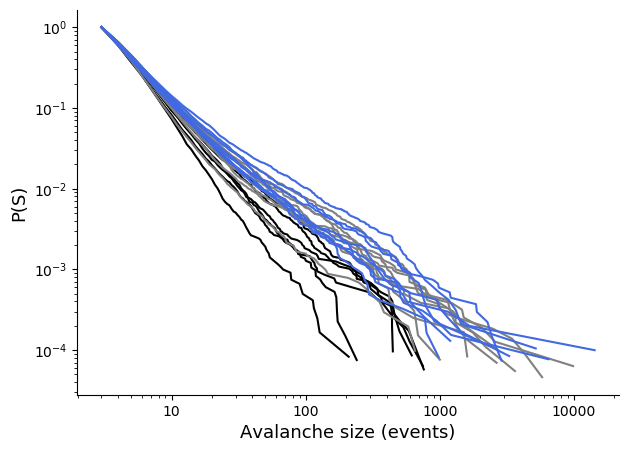

In [107]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(NR_list)):
    for e in range(len(NR_list[i])):
        avdistcut = np.load(NR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

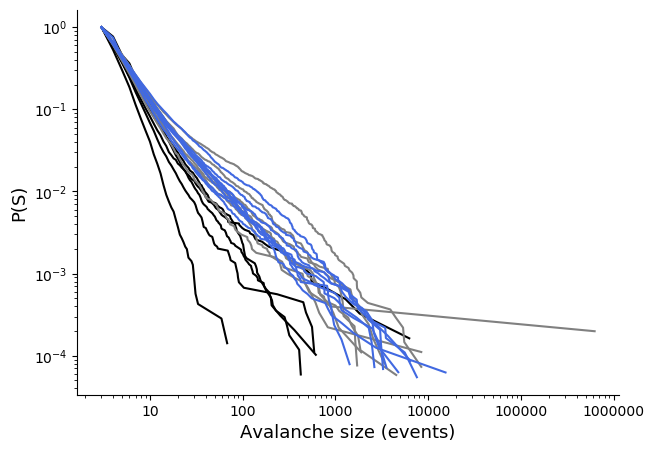

In [108]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(GR_list)):
    for e in range(len(GR_list[i])):
        avdistcut = np.load(GR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

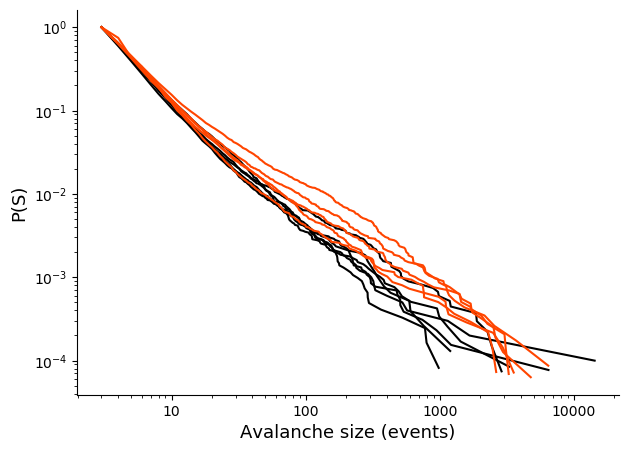

In [120]:
#3dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 0
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

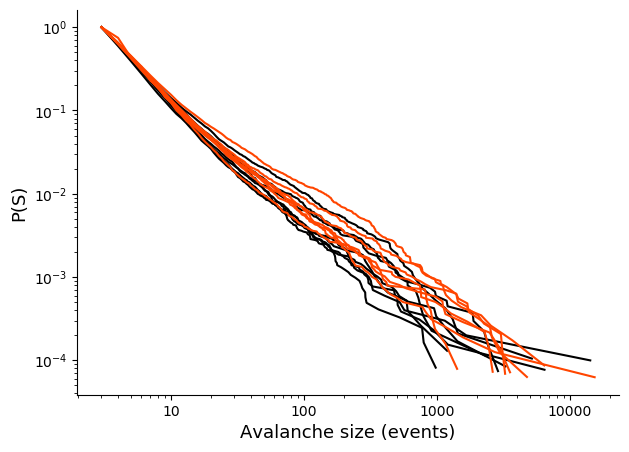

In [119]:
#5dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 1
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

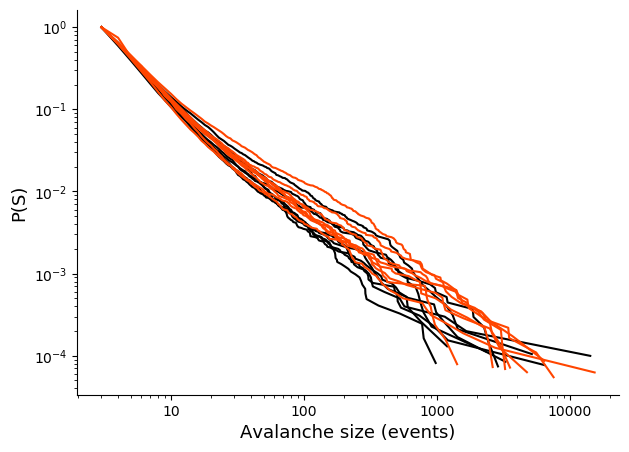

In [118]:
#7dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 2
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [179]:
np.load(av_list[i][e])

array([[245,   4,  32, ...,   8,   5,   3],
       [ 13,   2,   7, ...,   3,   2,   1]])

In [181]:
for i in range(len(av_list)):
    for e in range(len(av_list[i])):
        curr_av = np.load(av_list[i][e])
        dcc = crfn.DCC(curr_av)
        np.save(savepath + av_list[i][e][:av_list[i][e].find('all_cells')+10] + 'dcc.npy', dcc)
        print('Done ' + av_list[i][e])

Done 180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy
Done 180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f2_sa_aligned_all_cells

In [182]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_dcc = sorted(glob.glob('*NR*3dpf*dcc*')) 
NR_5_dcc = sorted(glob.glob('*NR*5dpf*dcc*')) 
NR_7_dcc = sorted(glob.glob('*NR*7dpf*dcc*')) 

GR_3_dcc = sorted(glob.glob('*GR*3dpf*dcc*')) 
GR_5_dcc = sorted(glob.glob('*GR*5dpf*dcc*')) 
GR_7_dcc = sorted(glob.glob('*GR*7dpf*dcc*')) 

NR_list = NR_3_dcc, NR_5_dcc, NR_7_dcc
GR_list = GR_3_dcc, GR_5_dcc, GR_7_dcc
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_dcc.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_dcc.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180220_WT_NR_h2b_gc

In [196]:
np.load(NR_list[0][0])

array([0.1481087 , 2.82263298, 3.20916077])

In [210]:
#EXP - SIZE
import pandas as pd

exp_s = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_s[count] = np.load(list_list[i][x][e])[1]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
exps_df = pd.DataFrame({"exponent":exp_s , "age":age, "condition": cond})

exp_d = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_d[count] = np.load(list_list[i][x][e])[2]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
expd_df = pd.DataFrame({"exponent":exp_d , "age":age, "condition": cond})


dcc = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            dcc[count] = np.load(list_list[i][x][e])[0]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
dcc_df = pd.DataFrame({"dcc":dcc , "age":age, "condition": cond})

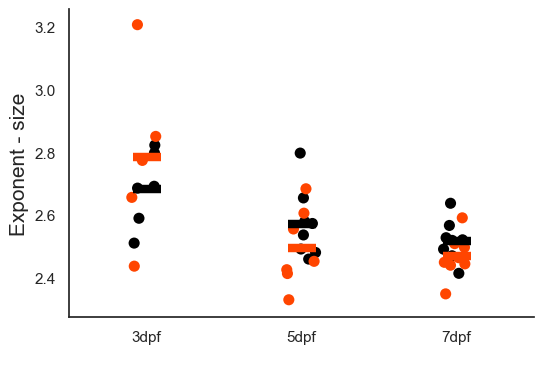

In [203]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - size', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

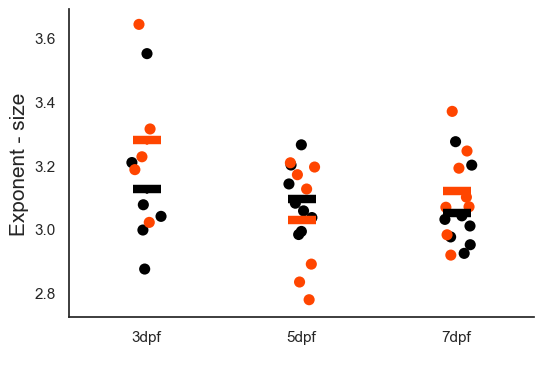

In [209]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - dur', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

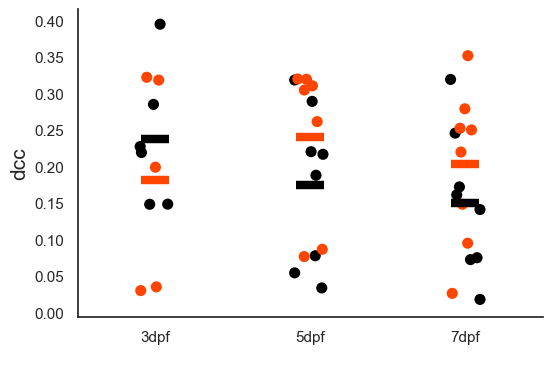

In [213]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dcc', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
#BR 
#----------------
for i in range(len(pkg_list)):
    for e in range(len(pkg_list[i])):
        pkg = np.load(pkg_list[i][e])
        av = np.load(av_list[i][e])
        br = crfn.branch(pkg, av)
        np.save(savepath + pkg_list[i][e][:pkg_list[i][e].find('all_cells')+10] + 'br.npy', br)
        print('Done ' + _list[i][e])

In [125]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_br = sorted(glob.glob('*NR*3dpf*br*')) 
NR_5_br = sorted(glob.glob('*NR*5dpf*br*')) 
NR_7_br = sorted(glob.glob('*NR*7dpf*br*')) 

GR_3_br = sorted(glob.glob('*GR*3dpf*br*')) 
GR_5_br = sorted(glob.glob('*GR*5dpf*br*')) 
GR_7_br = sorted(glob.glob('*GR*7dpf*br*')) 

NR_list = NR_3_br, NR_5_br, NR_7_br
GR_list = GR_3_br, GR_5_br, GR_7_br
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_br.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_br.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_br.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [158]:
#BRANCH RATIO
import pandas as pd

branch = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            branch[count] = np.load(list_list[i][x][e])
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
bdf = pd.DataFrame({"Branching ratio":branch , "age":age, "condition": cond})


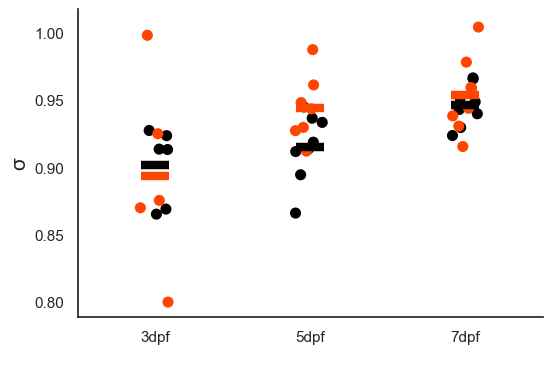

In [176]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()